<a href="https://colab.research.google.com/github/Matus-Dubrava/ml_colab/blob/master/1dcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

TensorFlow 2.x selected.


In [0]:
max_features = 10000
maxlen = 500
validation_length = 1000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [0]:
X_train = pad_sequences(train_data[:-validation_length], maxlen)
X_valid = pad_sequences(train_data[-validation_length:], maxlen)
X_test = pad_sequences(test_data, maxlen)

In [0]:
y_train = train_labels[:-validation_length]
y_valid = train_labels[-validation_length:]
y_test = test_labels

In [0]:
model = keras.Sequential([
                          keras.layers.Embedding(max_features, 128, input_length=maxlen),
                          keras.layers.Conv1D(32, 7, activation="relu"),
                          keras.layers.MaxPool1D(5),
                          keras.layers.Conv1D(32, 7, activation="relu"),
                          keras.layers.GlobalMaxPool1D(),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32, 
          validation_data=(X_valid, y_valid))

Train on 24000 samples, validate on 1000 samples
Epoch 1/10
24000/24000 [==============================] - 92s 4ms/sample - loss: 0.4064 - accuracy: 0.8016 - val_loss: 0.3160 - val_accuracy: 0.8610
Epoch 2/10
24000/24000 [==============================] - 92s 4ms/sample - loss: 0.2407 - accuracy: 0.9034 - val_loss: 0.2970 - val_accuracy: 0.8790
Epoch 3/10
24000/24000 [==============================] - 93s 4ms/sample - loss: 0.1786 - accuracy: 0.9323 - val_loss: 0.2798 - val_accuracy: 0.8890
Epoch 4/10
24000/24000 [==============================] - 92s 4ms/sample - loss: 0.1276 - accuracy: 0.9532 - val_loss: 0.2943 - val_accuracy: 0.8920
Epoch 5/10
24000/24000 [==============================] - 91s 4ms/sample - loss: 0.0783 - accuracy: 0.9739 - val_loss: 0.3205 - val_accuracy: 0.8820
Epoch 6/10
24000/24000 [==============================] - 92s 4ms/sample - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.4072 - val_accuracy: 0.8850
Epoch 7/10
24000/24000 [==============================] -

In [0]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

def plot_metrics(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  epochs = range(1, len(loss) + 1)

  fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
  ax[0].plot(epochs, loss, "b", label="training loss")
  ax[0].plot(epochs, val_loss, "g", label="validation loss")
  ax[0].set(title="Training & Validation Loss", xlabel="#Epoch", ylabel="Loss")
  ax[0].legend()

  ax[1].plot(epochs, acc, "b", label="training accuracy")
  ax[1].plot(epochs, val_acc, "g", label="validation accuracy")
  ax[1].set(title="Training & Validation Accuracy", xlabel="#Epoch", ylabel="Accuracy")
  ax[1].legend()

  plt.show()

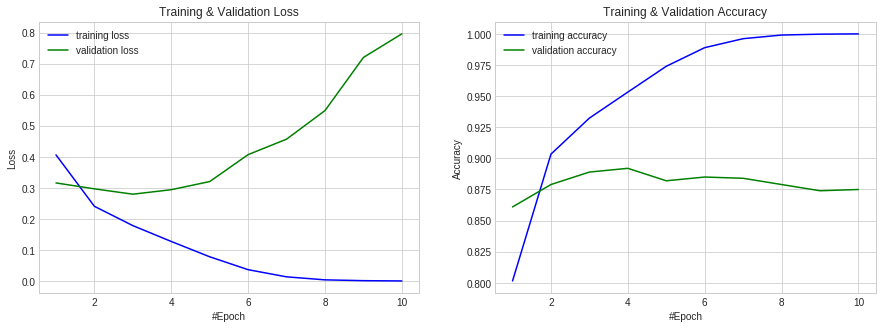

In [16]:
plot_metrics(model.history)